
##Prediction of Crime-Rate in District of India

**To solve this dataset we have used KNN DECISION TREE CLASSIFIER** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import math
from sklearn.preprocessing import OneHotEncoder    #used for preprocessing
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/crime.csv')
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,False
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,False
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,True
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,False
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,True


In [ ]:
data.info()
#print(round(9017 / 9016 * 100,2), "percentage of the data has been retained.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

**Data Preprocessing**

In [ ]:
# Dataset is Clean 
print("Number of Missing Values in the whole dataset : ", data.isna().sum().sum())

Number of Missing Values in the whole dataset :  0


In [ ]:
data.isnull()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
cont = data._get_numeric_data().columns
print("The continuous variables are: ",list(cont))

The continuous variables are:  ['YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES', 'CRIME']


In [ ]:
print("The categorical variables are: ",list(set(data.columns) - set(cont)))

The categorical variables are:  ['STATE/UT', 'DISTRICT']


In [ ]:
data['STATE/UT'].value_counts()

UTTAR PRADESH        878
MADHYA PRADESH       628
MAHARASHTRA          552
BIHAR                540
TAMIL NADU           469
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                362
JAMMU & KASHMIR      322
PUNJAB               314
JHARKHAND            312
WEST BENGAL          309
HARYANA              268
CHHATTISGARH         266
KERALA               233
ARUNACHAL PRADESH    195
DELHI UT             183
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             138
MANIPUR              125
MIZORAM              108
MEGHALAYA             96
TRIPURA               67
SIKKIM                60
A & N ISLANDS         36
DAMAN & DIU           36
GOA                   36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: STATE/UT, dtype: int64

In [ ]:
data['CRIME'].value_counts()

False    7509
True     1508
Name: CRIME, dtype: int64

**Data Visualization**

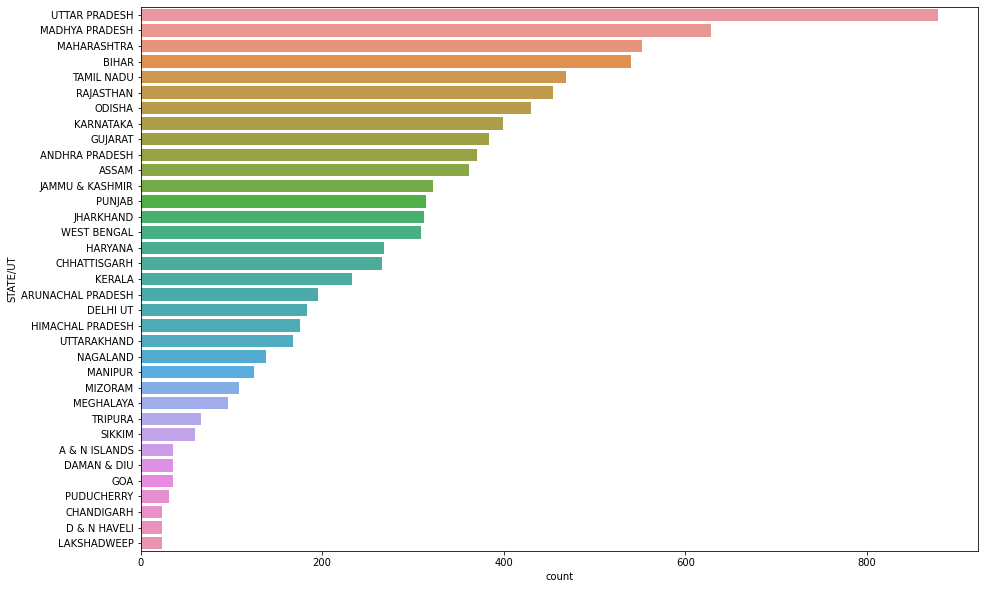

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'STATE/UT', data = data, order = data['STATE/UT'].value_counts().iloc[:40].index)

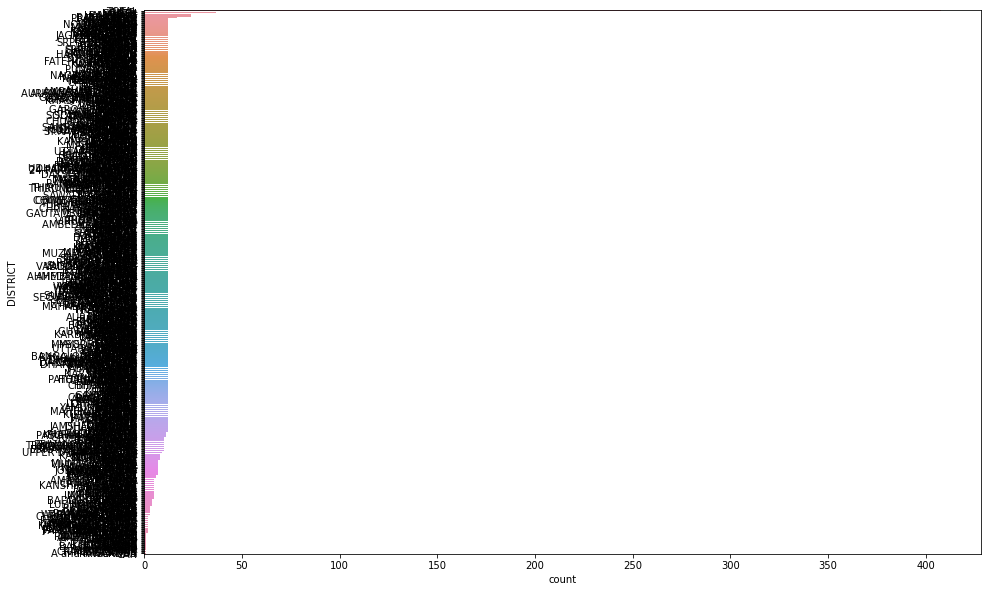

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'DISTRICT', data = data, order = data['DISTRICT'].value_counts().iloc[:10000].index)

Text(0, 0.5, 'Number of Crimes')

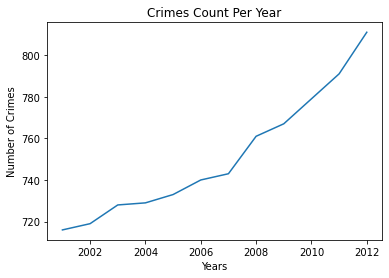

In [ ]:
plt.plot(data['YEAR'].value_counts())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0.5, 1.0, 'TOTAL CRIME RATE ')

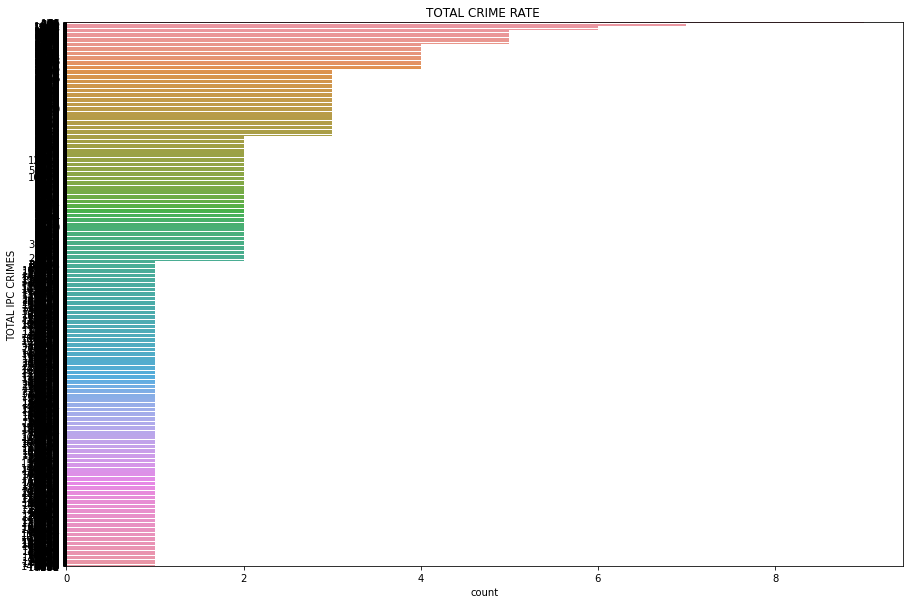

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'TOTAL IPC CRIMES', data = data, order = data['TOTAL IPC CRIMES'].value_counts().iloc[:10000].index)
plt.title("TOTAL CRIME RATE ")

In [ ]:
print(data['CRIME'].value_counts())

False    7509
True     1508
Name: CRIME, dtype: int64


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['STATE/UT']= label_encoder.fit_transform(data['STATE/UT'])
data['STATE/UT'].unique()

array([ 1,  2,  3,  4,  6, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34,  0,  5,  7,  8,  9, 18,
       26])

In [ ]:
data['YEAR']= label_encoder.fit_transform(data['YEAR'])
data['YEAR'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
# Converting True & False value into 0 & 1
data["CRIME"] = data["CRIME"].astype(int)

**GRAPH TO VISUALIZE WHICH PREDICTION CAN BE USE**

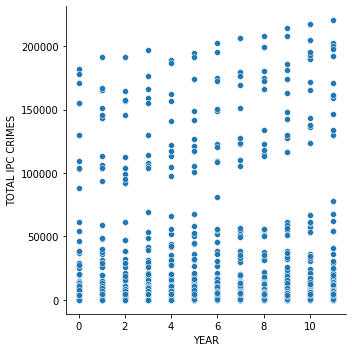

In [ ]:
sns.relplot(x='YEAR',y='TOTAL IPC CRIMES',data=data)

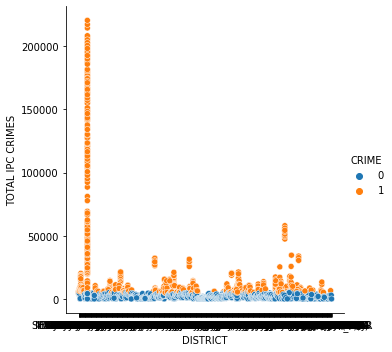

In [ ]:
#Crime Rate Greater than 5000 in District
sns.relplot(x='DISTRICT', y = 'TOTAL IPC CRIMES', hue = 'CRIME',data=data)

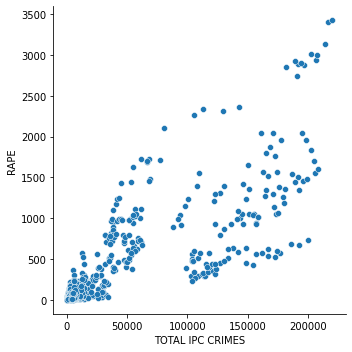

In [ ]:
sns.relplot(x="TOTAL IPC CRIMES" , y = "RAPE" , data=data)

**Splitting Data in Into Train & Test**

In [ ]:
data.drop(["STATE/UT","DISTRICT","TOTAL IPC CRIMES","CRIME"],axis =1)
X = data.iloc[:, 2:-1].values
y = data.iloc[:, 33].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#KNN is used to Predict the Crime Rate 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1508    0]
 [ 227   69]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1508
           1       1.00      0.23      0.38       296

    accuracy                           0.87      1804
   macro avg       0.93      0.62      0.65      1804
weighted avg       0.89      0.87      0.84      1804



In [ ]:
error = []

# Calculating error for K values between 1 and 100
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

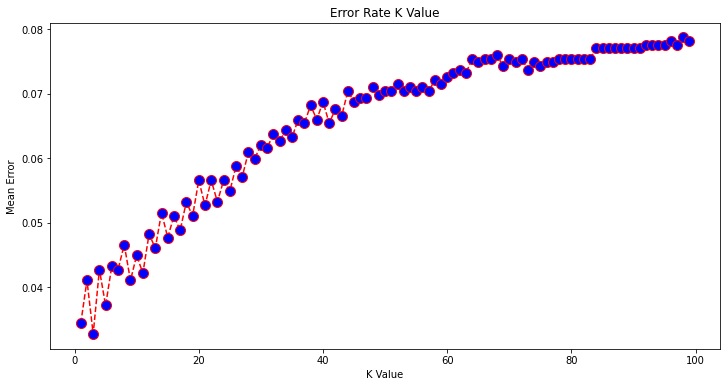

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9861419068736141


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9628603104212861


In [ ]:
k_range = range(100, 1000)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 100 to 1000
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9212860310421286, 0.9218403547671841, 0.9207317073170732, 0.9212860310421286, 0.9212860310421286, 0.9218403547671841, 0.9212860310421286, 0.9212860310421286, 0.9207317073170732, 0.9207317073170732, 0.9201773835920177, 0.9201773835920177, 0.9196230598669624, 0.9201773835920177, 0.9190687361419069, 0.9196230598669624, 0.9190687361419069, 0.9196230598669624, 0.9185144124168514, 0.9185144124168514, 0.9185144124168514, 0.9185144124168514, 0.917960088691796, 0.9196230598669624, 0.9190687361419069, 0.9196230598669624, 0.9190687361419069, 0.9196230598669624, 0.9174057649667405, 0.917960088691796, 0.9168514412416852, 0.917960088691796, 0.9168514412416852, 0.9174057649667405, 0.9162971175166297, 0.9162971175166297, 0.9162971175166297, 0.9168514412416852, 0.9157427937915743, 0.9157427937915743, 0.9157427937915743, 0.9157427937915743, 0.9151884700665188, 0.9162971175166297, 0.9157427937915743, 0.9162971175166297, 0.9162971175166297, 0.9162971175166297, 0.9157427937915743, 0.9157427937915743, 0.

Text(0, 0.5, 'Testing Accuracy')

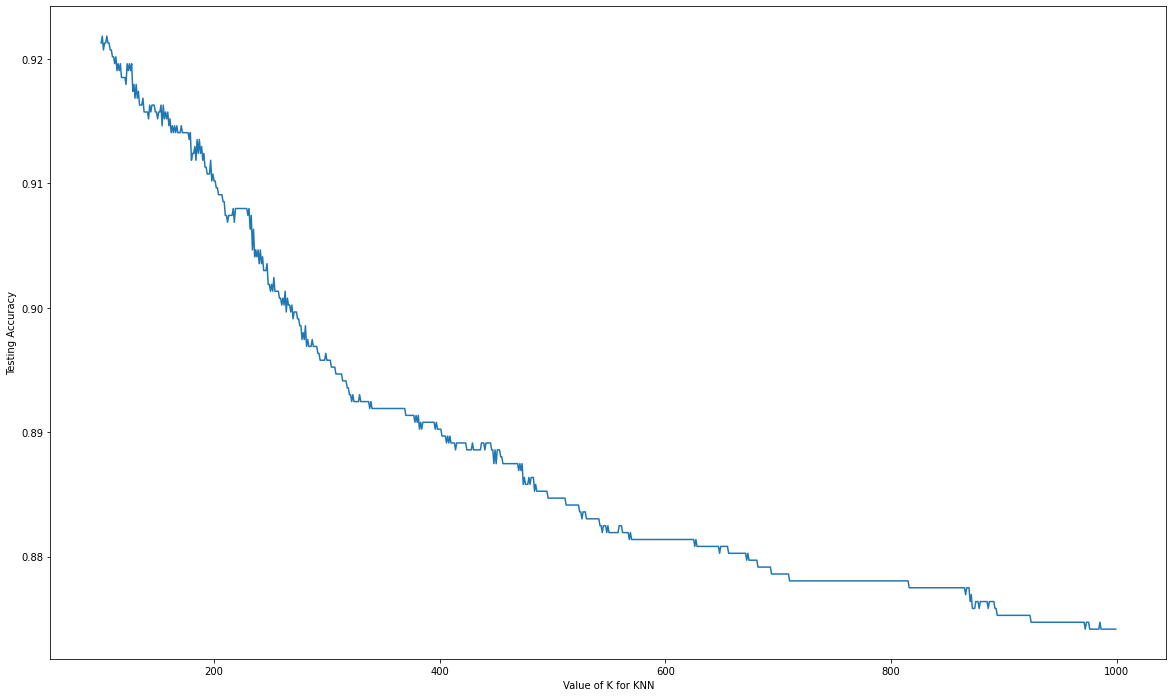

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(figsize=(20, 12))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
percentage_intances = data.groupby('CRIME').size() * 100 / len(data) #crime rate percentage based on true or false value that is crime is greater than 5000 or not
print(percentage_intances)
print("------------------")
print("Percentage Positive Instance = {}\nPercentage Negative Instance = {} ".format(percentage_intances[1],percentage_intances[0]))
print(confusion_matrix(y_test, y_pred)) 

CRIME
0    83.276034
1    16.723966
dtype: float64
------------------
Percentage Positive Instance = 16.723965842297883
Percentage Negative Instance = 83.27603415770211 
[[1508    0]
 [ 227   69]]


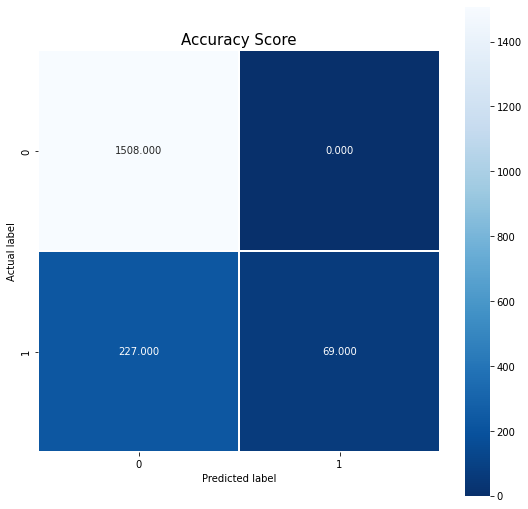

In [ ]:
#Confusion Matrix for Crime Rate > 5000
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'.format()
plt.title(all_sample_title, size = 15);

In [ ]:
X = data.drop("STATE/UT",axis=1).values
y = data["STATE/UT"].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test) #decision tree array for test
predictions

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
cols = ['YEAR', 'STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES', 'CRIME']
new_data = data[cols]
new_data.head()

,YEAR,STATE/UT,DISTRICT,TOTAL IPC CRIMES,CRIME
0,0,1,ADILABAD,4154,0
1,0,1,ANANTAPUR,4125,0
2,0,1,CHITTOOR,5818,1
3,0,1,CUDDAPAH,3140,0
4,0,1,EAST GODAVARI,6507,1


In [ ]:
new_data['DISTRICT'] = new_data['DISTRICT'].astype('category')
new_data['CRIME'] = new_data['CRIME'].astype('category')

new_data['DISTRICT_Cat'] = new_data['DISTRICT'].cat.codes
new_data['CRIME_Cat'] = new_data['DISTRICT'].cat.codes
# new_df['Crime_Cat'] = new_df['Primary Type'].cat.codes
new_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,YEAR,STATE/UT,DISTRICT,TOTAL IPC CRIMES,CRIME,DISTRICT_Cat,CRIME_Cat
0,0,1,ADILABAD,4154,0,3,3
1,0,1,ANANTAPUR,4125,0,28,28
2,0,1,CHITTOOR,5818,1,154,154
3,0,1,CUDDAPAH,3140,0,172,172
4,0,1,EAST GODAVARI,6507,1,220,220


# Using Decision Trees for classification

In [ ]:
X = new_data[[ 'TOTAL IPC CRIMES','DISTRICT_Cat', 'YEAR']] # independent variable
y = new_data['STATE/UT'] # dependent variable 

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75:25 split

# print(X_train)
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=10)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Accuracy: 87.58314855875831 


----------Confusion Matrix------------------------------------
Predicted Alarm  0   1   2   3    4   5   6   7   8   9   ...  25  26  27  \
Actual Alarm                                              ...               
0                 6   0   0   0    0   0   0   0   0   0  ...   0   0   0   
1                 0  74   0   3    0   0   0   0   0   0  ...   0   1   0   
2                 0   0  45   0    0   0   0   0   0   0  ...   0   0   0   
3                 0   0   0  70    0   0   4   0   0   0  ...   3   0   0   
4                 0   1   0   0  114   0   0   0   0   0  ...   3   0   0   
5                 0   0   0   0    0   3   0   0   0   0  ...   0   0   0   
6                 0   1   1   0    0   0  52   0   0   0  ...   3   0   1   
7                 0   0   0   0    0   0   0   5   0   0  ...   0   0   0   
8                 0   0   0   0    0   0   0   1   8   0  ...   0   0   0   
9                 0   0   0   0    0   0   0   0   0  38  .